## Visualizacion
Usaremos en esta clase, el paquete `plotnine`

(https://plotnine.readthedocs.io)

In [6]:
from geopandas import *
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from plotnine import *

Un ejemplo clásico de que la visualización es importante: _anscombe_

In [7]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
anscombe = pd.DataFrame(list(zip(x,x,x,x4,y1,y2,y3,y4)),\
                        columns=['X1','X2','X3','X4','Y1','Y2','Y3','Y4'])
anscombe

,X1,X2,X3,X4,Y1,Y2,Y3,Y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


Veamos unas estadísticas básicas:

In [8]:
anscombe.mean()

X1    9.000000
X2    9.000000
X3    9.000000
X4    9.000000
Y1    7.500909
Y2    7.500909
Y3    7.500000
Y4    7.500909
dtype: float64

In [9]:
anscombe.std()

X1    3.316625
X2    3.316625
X3    3.316625
X4    3.316625
Y1    2.031568
Y2    2.031657
Y3    2.030424
Y4    2.030579
dtype: float64

In [10]:
anscombe.corr()

,X1,X2,X3,X4,Y1,Y2,Y3,Y4
X1,1.000000,1.000000,1.000000,-0.500000,0.816421,0.816237,0.816287,-0.314047
X2,1.000000,1.000000,1.000000,-0.500000,0.816421,0.816237,0.816287,-0.314047
X3,1.000000,1.000000,1.000000,-0.500000,0.816421,0.816237,0.816287,-0.314047
X4,-0.500000,-0.500000,-0.500000,1.000000,-0.529093,-0.718437,-0.344661,0.816521
Y1,0.816421,0.816421,0.816421,-0.529093,1.000000,0.750005,0.468717,-0.489116
Y2,0.816237,0.816237,0.816237,-0.718437,0.750005,1.000000,0.587919,-0.478095
Y3,0.816287,0.816287,0.816287,-0.344661,0.468717,0.587919,1.000000,-0.155472
Y4,-0.314047,-0.314047,-0.314047,0.816521,-0.489116,-0.478095,-0.155472,1.000000


In [16]:
sm.ols("Y4~X4", anscombe).fit().params

Intercept    3.001727
X4           0.499909
dtype: float64

Miremos los datos en un gráfico

<AxesSubplot:xlabel='X4', ylabel='Y4'>

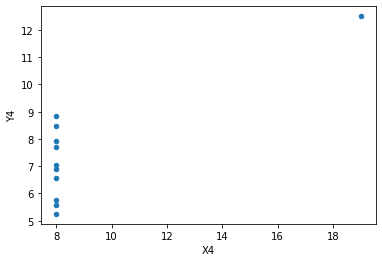

In [20]:
anscombe.plot(x='X4',y='Y4', kind='scatter')

Como vemos, visualizar los datos es una forma importante de análisis (cuando es posible), y para eso, estudiaremos un paquete especialmente diseñado para esto: **GGPLOT**

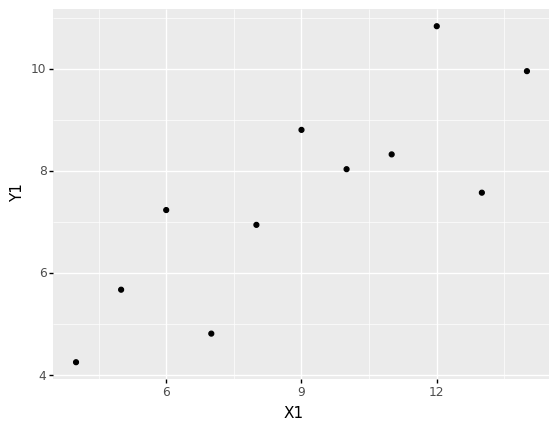

<ggplot: (326847299)>

In [21]:
ggplot(anscombe, aes(x='X1',y='Y1')) + geom_point()

# The Grammar of Graphics



El paquete ggplot2 es un paquete basado en el paradigma de “The Grammar of Graphics” (Leland Wilkinson).

*“ggplot2 is a plotting system for R, based on the grammar of graphics, which tries to take the good parts of base and lattice graphics and none of the bad parts. It takes care of many of the fiddly details that make plotting a hassle (like drawing legends) as well as providing a powerful model of graphics that makes it easy to produce complex multi-layered graphics.”* (Hadley Wickham, creator, www.ggplot2.org)

En este paradigma, un gráfico depende de 3 elementos:

1. Datos (DataFrame)
2. “Aesthetic” que describe como los datos se mapean a un atributo gráfico (color, forma, eje x-y, …)
3. Geometrías, que determinan como los valores se representan. (puntos, lineas, boxplot, …)

El comando `ggplot` permite hacer usar la gramática de gráficos, para visualizar datos. El formato es:
```
   ggplot (<DataFrame>, aes(<aesthetics>)) + geom_<geometria>()
```

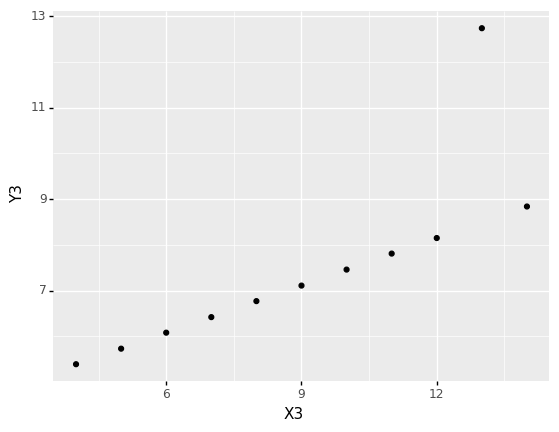

<ggplot: (326854786)>

In [26]:
ggplot(anscombe, aes(x='X3',y='Y3')) + geom_point()

Lo mas importante, los datos:

`data = anscombe`

Los  "aesthetic"  se especifican con `aes( )`
- `x = "X1"`  : la columna X1 es el eje x
- `y = "Y1"`  : la columna Y1 es el eje y

finalmente, le decimos que "geometría: utilizar.
pueden ser barras, lineas, puntos, etc.

`+ geom_point()`


 Esta es una diferencia crucial con otros paquetes de 
 dibujo que requiere aprender distintos comandos para cada tipo
 de dibujo.



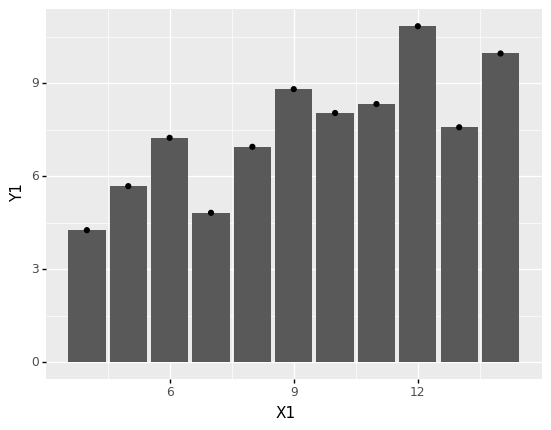

<ggplot: (327036383)>

In [31]:
ggplot(anscombe, aes(x='X1',y='Y1')) + geom_col() + geom_point()

Se pueden agregar atributos al gráfico (pero recordar que **no es lo que queremos** a priori)

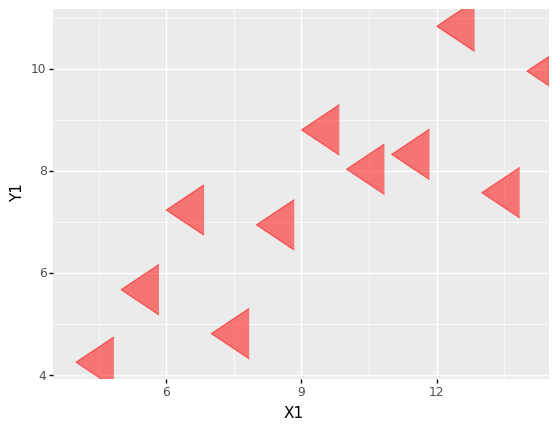

<ggplot: (327057884)>

In [33]:
ggplot(anscombe, aes(x='X1',y='Y1')) + geom_point(color='red', size=20, shape=4, alpha=0.5)

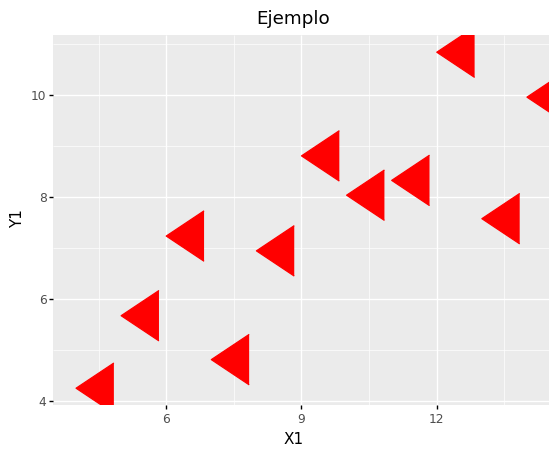

<ggplot: (327084840)>

In [34]:
ggplot(anscombe, aes(x='X1',y='Y1'))\
+ geom_point(color='red', size=20, shape=4)\
+ ggtitle('Ejemplo')

In [36]:
a =1
a

1

O guardarlo como una variable para despues usarlos (por ejemplo, grabarlos en un archivo)

In [39]:
miPlot = ggplot(anscombe, aes(x='X1',y='Y1'))+ geom_point() + ggtitle('Ejemplo')
miPlot
ggsave(miPlot, "ejemplo.jpg")

/usr/local/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ejemplo.jpg


In [40]:
ggsave?

o agregar elementos al grafico como un titulo, o etiquetas.

Usemos ahora otra base de datos:

In [41]:
iris = pd.read_csv("iris.csv")
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Ejercicio 1:
Dibuje un gráfico de puntos (scatterplot) de *SepalLength* vs *PetalLength*

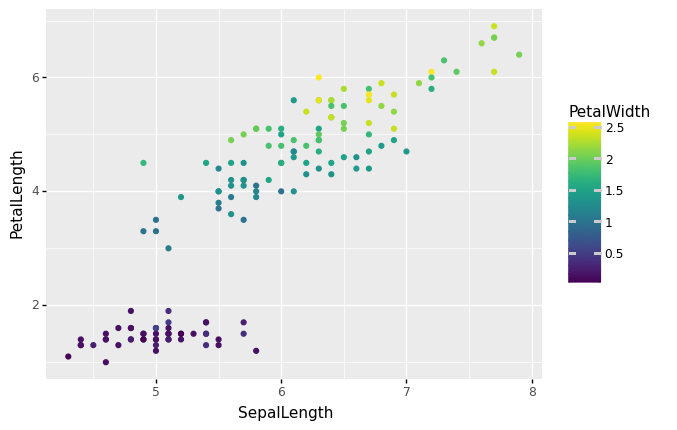

<ggplot: (327007389)>

In [52]:
ggplot(iris, aes(x = "SepalLength", y = "PetalLength", color="PetalWidth")) + geom_point()

Agreguemos aesthetics: Por ejemplo, podemos agregar la información de la especie, como un color:

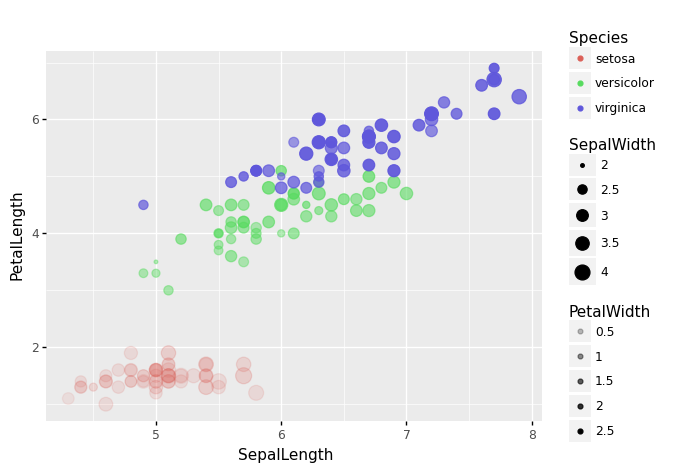

<ggplot: (327003308)>

In [49]:
ggplot(iris, aes(y = "PetalLength", x = "SepalLength", color = "Species", size="SepalWidth", alpha="PetalWidth"))\
+ geom_point()

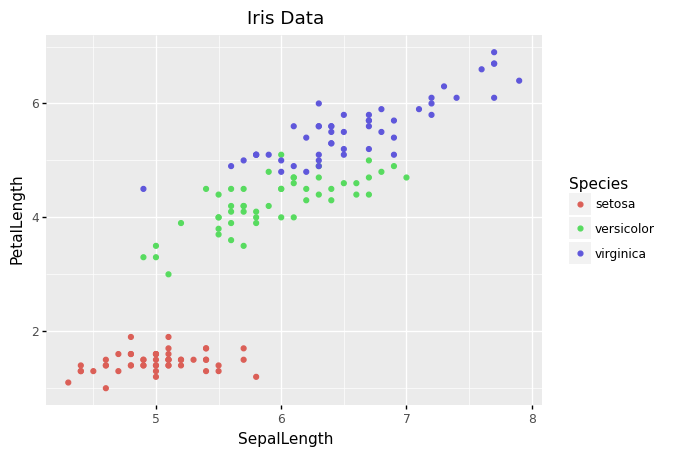

<ggplot: (327258594)>

In [55]:
ggplot(iris, aes(y = "PetalLength", x = "SepalLength", color="Species"))\
+  ggtitle("Iris Data") + geom_point()

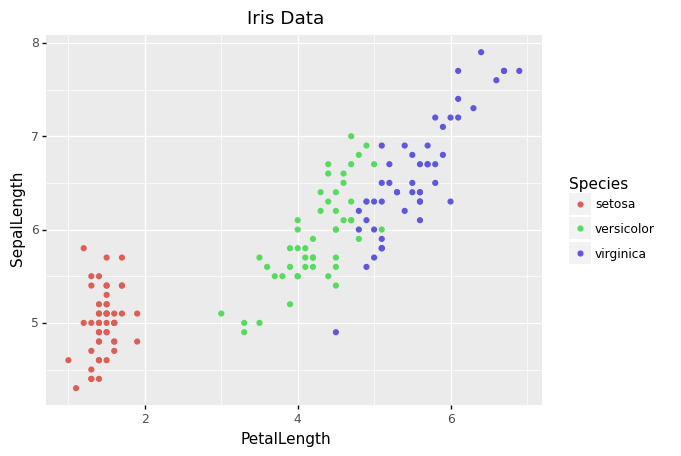

<ggplot: (327299265)>

In [56]:
ggplot(iris, aes(x = "PetalLength", y = "SepalLength"))\
+  ggtitle("Iris Data") + geom_point(aes(color = "Species"))

Los `aestethics` de las geometrias re-escriben los de aestethics generales.

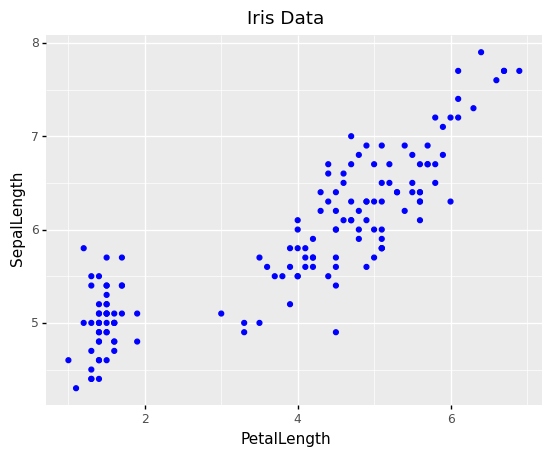

<ggplot: (327277719)>

In [58]:
ggplot(iris, aes(x = "PetalLength", y = "SepalLength", color = "Species"))\
+  ggtitle("Iris Data") + geom_point(color="blue")

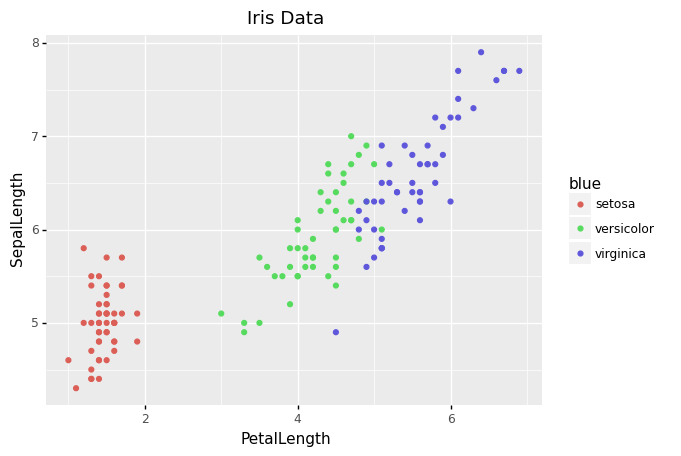

<ggplot: (327138813)>

In [59]:
ggplot(iris, aes(x = "PetalLength", y = "SepalLength", color = "blue"))\
+  ggtitle("Iris Data") + geom_point(aes(color="Species"))

Esto es especialmente importante cuando usamos "capas" de un dibujo sobre otro.

Ejemplo:


/usr/local/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


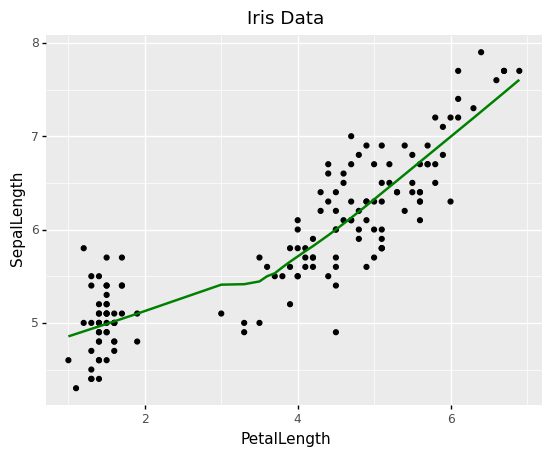

<ggplot: (327046072)>

In [64]:
ggplot(iris, aes(x = "PetalLength", y = "SepalLength")) \
 + ggtitle("Iris Data") + geom_point() + geom_smooth(color="green")

/usr/local/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


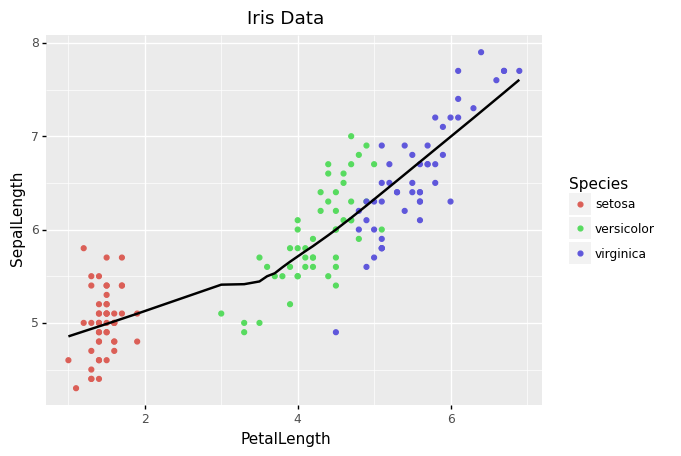

<ggplot: (326877079)>

In [62]:
ggplot(iris, aes(x = "PetalLength", y = "SepalLength")) \
 + ggtitle("Iris Data") + geom_point(aes(color = "Species")) + geom_smooth()

/usr/local/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


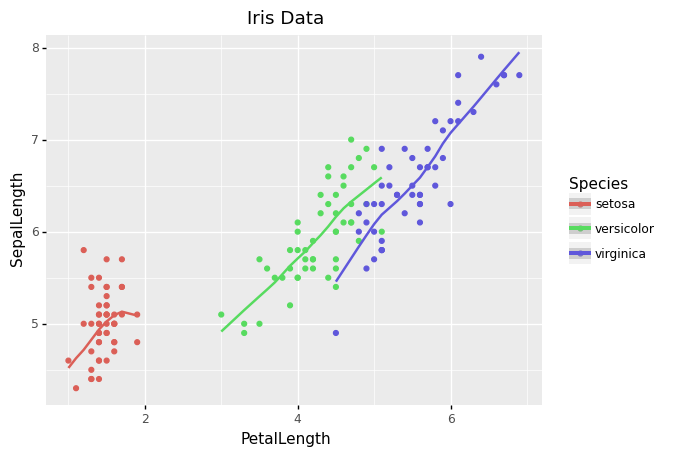

<ggplot: (326926424)>

In [63]:
ggplot(iris, aes(x = "PetalLength", y = "SepalLength", color = "Species")) \
 + ggtitle("Iris Data") + geom_point() + geom_smooth()

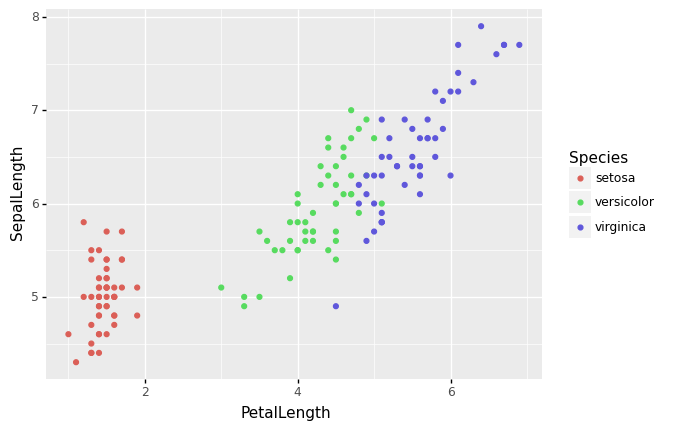

<ggplot: (327143403)>

In [71]:
ggplot(iris, aes(x = "PetalLength", y = "SepalLength")) + geom_point(aes(color = "Species"))

## Ejercicio 2: 
cambiar el tamaño del punto sea de acuerdo a *PetalWidth*

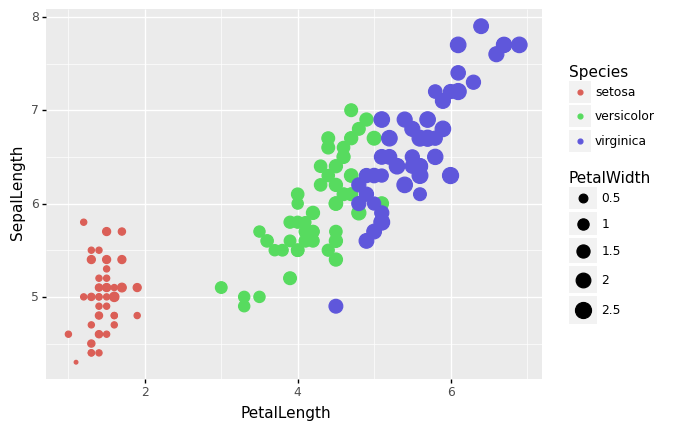

<ggplot: (327140843)>

In [72]:
ggplot(iris, aes(x = "PetalLength", y = "SepalLength", color = "Species", size='PetalWidth')) +geom_point()

Podemos ajustar la trasparencia (`alpha`) de un color para ver si hay puntos ocultos (o mostrar una nueva variable!)


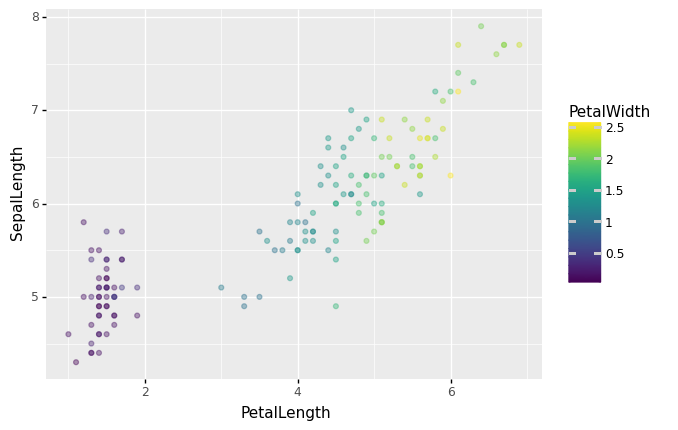

<ggplot: (326977874)>

In [80]:
ggplot(iris, aes(x = "PetalLength", y = "SepalLength", color = "PetalWidth"))\
+geom_point(alpha=0.4)

In [84]:
iris['PetalWidth2']=iris['PetalWidth'].astype('category')

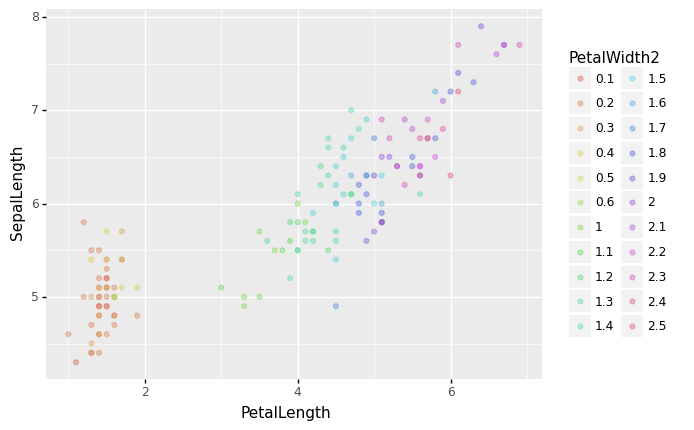

<ggplot: (327004751)>

In [86]:
ggplot(iris, aes(x = "PetalLength", y = "SepalLength", color = "PetalWidth2"))\
+geom_point(alpha=0.4)

Nota:  GGplot elige automaticamente basado en los datos como hacer los aesthetics.  Por ejemplo:

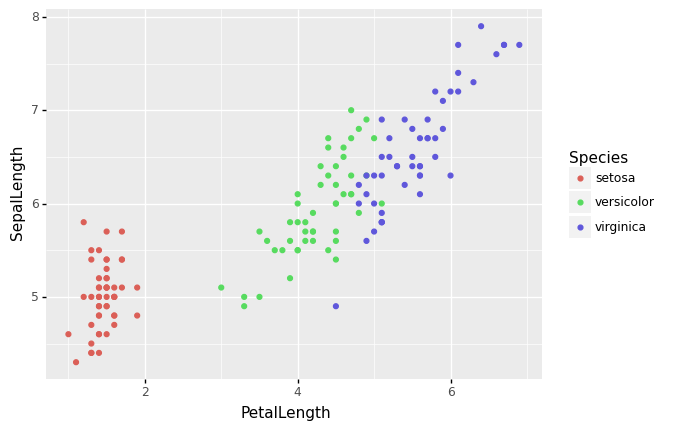

<ggplot: (326872450)>

In [87]:
ggplot(iris, aes(x = "PetalLength", y = "SepalLength", color = "Species"))\
+ geom_point()

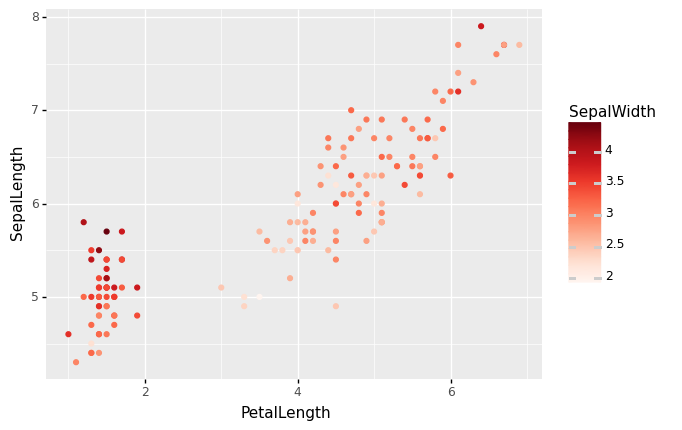

<ggplot: (326963902)>

In [92]:
ggplot(iris, aes(x = "PetalLength", y = "SepalLength", color = "SepalWidth"))\
+ geom_point() + scale_color_cmap('Reds')

### Mapas de colores:
(fuente: https://matplotlib.org/tutorials/colors/colormaps.html)


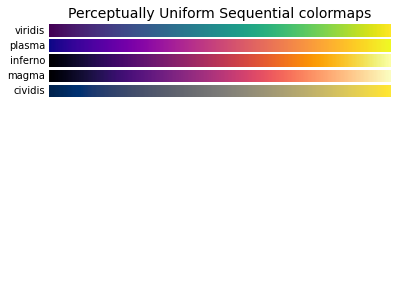

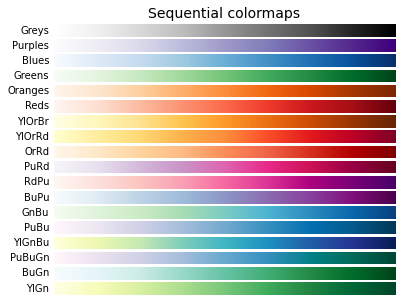

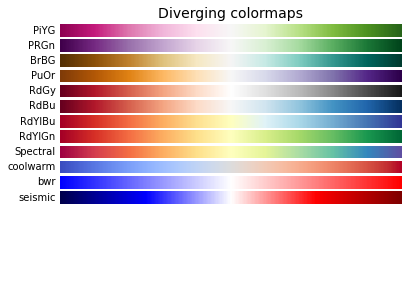

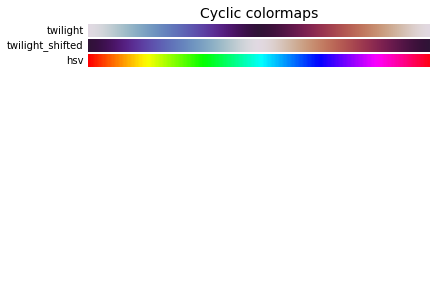

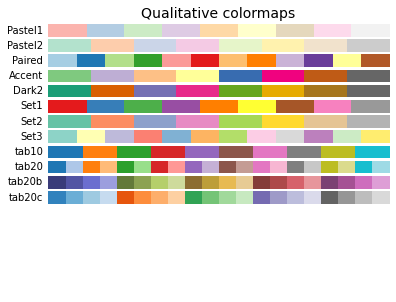

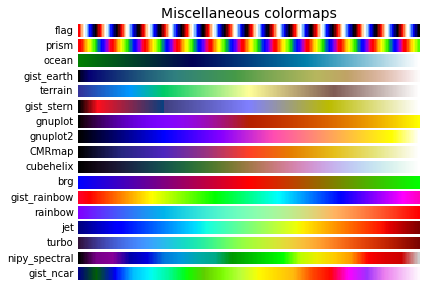

In [89]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
#from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']

cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar']

nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()


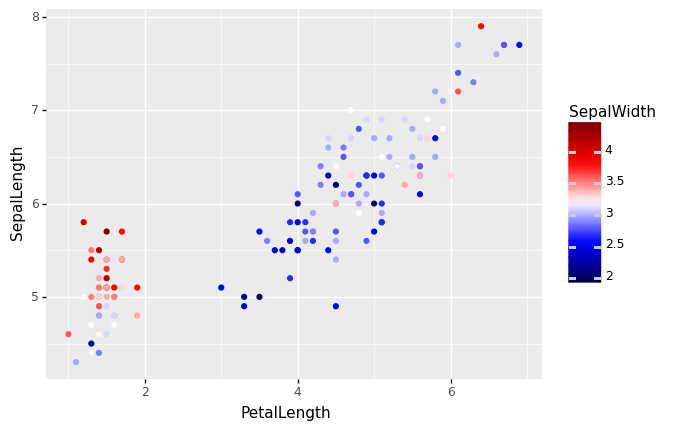

<ggplot: (326963878)>

In [95]:
ggplot(iris, aes(x = "PetalLength", y = "SepalLength", color = "SepalWidth"))\
+ geom_point() + scale_color_cmap('seismic')

### Hubway

Volvamos a los datos de Hubway.  Carguemos los datos de las estaciones, y grafiquemos el resultado en el plano (como si fueran puntos).

In [132]:
dataStations = pd.read_csv("stations.csv", dtype={'id': 'category', 'name': 'object', 'lat': 'float64', 'lon': 'float64'})
dataStations

,id,name,lat,lng
0,3,Colleges of the Fenway,42.340021,-71.100812
1,4,Tremont St. at Berkeley St.,42.345392,-71.069616
2,5,Northeastern U / North Parking Lot,42.341814,-71.090179
3,6,Cambridge St. at Joy St.,42.361285,-71.065140
4,7,Fan Pier,42.353412,-71.044624
...,...,...,...,...
90,94,Charlestown - Main St at Austin St,42.375603,-71.064608
91,95,Cambridge St - at Columbia St / Webster Ave,42.372969,-71.094445
92,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075
93,97,Harvard University River Houses at DeWolfe St...,42.369182,-71.117152


Grafiquemos las estaciones en el plano. 

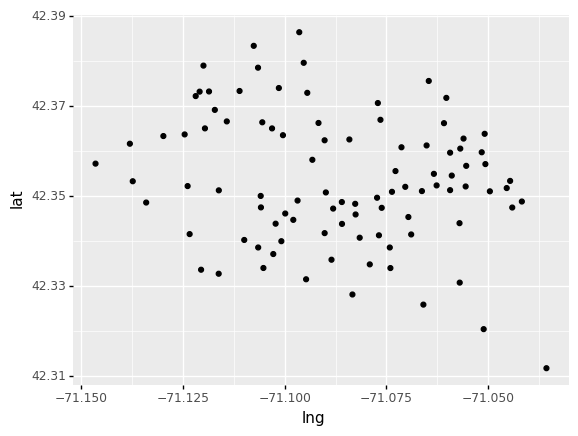

<ggplot: (328859784)>

In [97]:
ggplot(dataStations, aes(x='lng', y='lat')) + geom_point()

Podemos poner etiquetas (poco util si son muchos puntos):

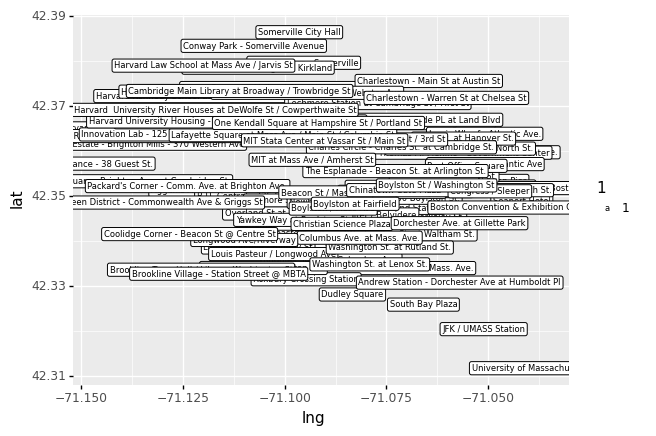

<ggplot: (328851074)>

In [98]:
ggplot(dataStations, aes(x='lng', y='lat')) + geom_point() + geom_label(aes(label='name', size=1))

### Usando mapas

Para mayor claridad, podemos usar un mapa. Por ejemplo, aca a partir de un *shapefile* de boston y Cambridge

[Fuente Boston](http://bostonopendata-boston.opendata.arcgis.com/datasets/142500a77e2a4dbeb94a86f7e0b568bc_9?geometry=-71.496%2C42.223%2C-70.617%2C42.401)

[Fuente Cambridge](https://www.cambridgema.gov/GIS/gisdatadictionary/Boundary/BOUNDARY_CDDNeighborhoods)

In [99]:
boston=GeoDataFrame.from_file('mapas/Boston_Neighborhoods.shp')
cambridge = GeoDataFrame.from_file('mapas/cambridge.shp')

In [101]:
cambridge

,N_HOOD,NAME,GlobalID,Webpage,Shape_area,Shape_len,geometry
0,4,The Port,{ED5E3360-A5DC-4A94-B1A2-56667062B754},https://www.cambridgema.gov/CDD/planud/neighpl...,8.346206e+06,11801.706662,"POLYGON ((-71.09853 42.37184, -71.09846 42.371..."
1,9,Neighborhood Nine,{5C8D020B-4883-4D21-AF50-2CC939451E04},https://www.cambridgema.gov/CDD/planud/neighpl...,1.776818e+07,20099.989638,"POLYGON ((-71.13044 42.39027, -71.12974 42.390..."
2,2,Area 2/MIT,{10FB33A8-55D2-4C22-B558-7F553139CE4E},https://www.cambridgema.gov/CDD/planud/neighpl...,1.774211e+07,22041.386902,"POLYGON ((-71.07809 42.35799, -71.07809 42.357..."
3,7,Riverside,{299A713A-BD58-46F8-9CF0-9AAF155E0294},https://www.cambridgema.gov/CDD/planud/neighpl...,9.575448e+06,15019.678412,"POLYGON ((-71.12318 42.36894, -71.12316 42.368..."
4,5,Cambridgeport,{2B966564-1135-4BE9-AE29-D94BBCCA61CD},https://www.cambridgema.gov/CDD/planud/neighpl...,1.580966e+07,16038.114882,"POLYGON ((-71.11679 42.36121, -71.11665 42.361..."
5,6,Mid-Cambridge,{01C9B143-6C4E-474A-8AFE-3E0C59D25989},https://www.cambridgema.gov/CDD/planud/neighpl...,1.298083e+07,15198.295124,"POLYGON ((-71.10727 42.37809, -71.10727 42.378..."
6,3,Wellington-Harrington,{62554B14-9B06-421D-BD6F-FBC78BD8D8A4},https://www.cambridgema.gov/CDD/planud/neighpl...,6.609875e+06,11769.746495,"POLYGON ((-71.08749 42.37328, -71.08751 42.373..."
7,1,East Cambridge,{7FB4DD2D-34A9-48FE-BE3B-97270FA86326},https://www.cambridgema.gov/CDD/planud/neighpl...,1.979585e+07,20067.077021,"POLYGON ((-71.07839 42.37386, -71.07834 42.373..."
8,8,Agassiz,{8E7ED0D1-E661-40EB-BC23-374A3E39567B},https://www.cambridgema.gov/CDD/planud/neighpl...,8.203376e+06,13107.332352,"POLYGON ((-71.10842 42.37910, -71.10841 42.379..."
9,12,Cambridge Highlands,{C0F9BF06-53F0-47EE-A291-82B172955DBF},https://www.cambridgema.gov/CDD/planud/neighpl...,1.477103e+07,17549.804363,"POLYGON ((-71.15650 42.39574, -71.15641 42.395..."


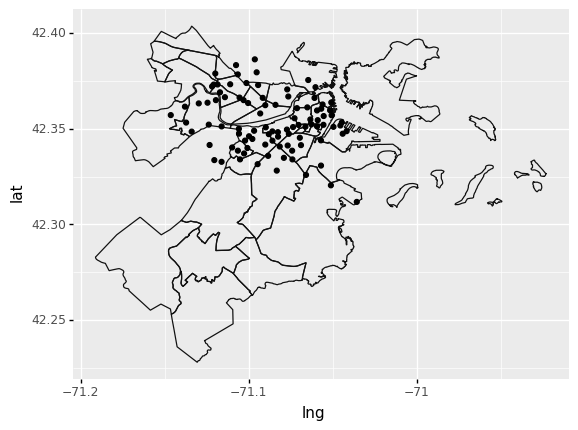

<ggplot: (326982672)>

In [109]:
ggplot()\
+ geom_map(cambridge, fill=None)\
+ geom_map(boston, fill=None)\
+ geom_point(dataStations, aes(x='lng', y='lat'))

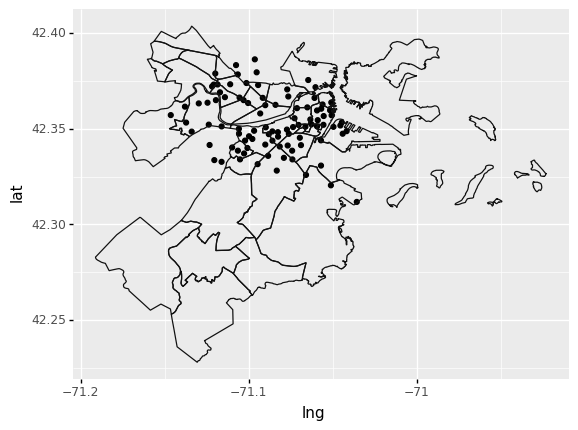

<ggplot: (327018972)>

In [110]:
ggplot() + geom_point(dataStations, aes(x='lng', y='lat'))\
+ geom_map(boston, fill=None) + geom_map(cambridge, fill=None)

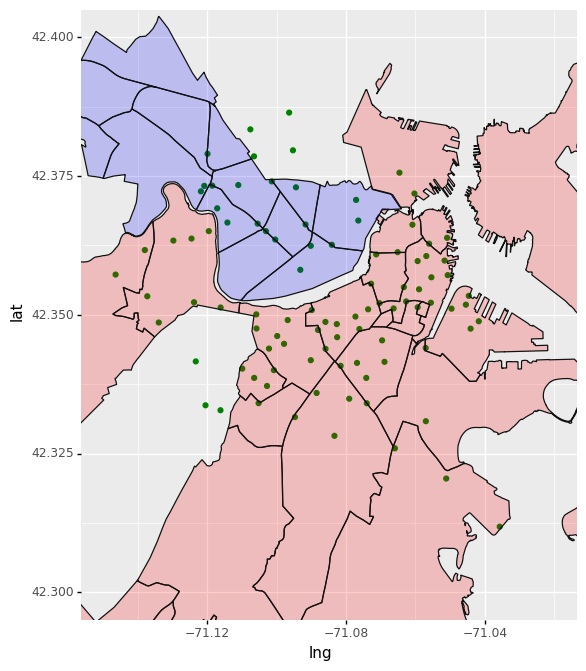

<ggplot: (326883675)>

In [131]:
ggplot() + geom_point(dataStations, aes(x='lng', y='lat'), color="green")\
+ geom_map(boston, fill="red", alpha=0.2) + geom_map(cambridge, fill="blue", alpha=0.2) \
+ coord_fixed(xlim=(-71.15,-71.02), ylim=(42.30,42.40),ratio=1.6)

Carguemos los datos de viajes:

In [133]:
dataTrips = pd.read_csv("trips_new.csv", dtype={'id': 'int64', 'duration': 'float64', 'start_date': 'object', 'start_station': 'category', 'end_date': 'object', 'end_station': 'category', 'bike_nr': 'category', 'subscription_type': 'category', 'zip_code': 'category', 'birth_date': 'float64', 'gender': 'category'})
dataTrips['start_date']=dataTrips['start_date'].astype('datetime64[ns]')
dataTrips['end_date']=dataTrips['end_date'].astype('datetime64[ns]')
dataTrips['duration']=dataTrips['duration']/60
dataTrips = dataTrips[dataTrips['duration']<24*60]
dataTrips=dataTrips.dropna(subset=['start_station', 'end_station'])
tmp1=pd.merge(dataTrips,dataStations,left_on='start_station', right_on='id')
finalData=pd.merge(tmp1,dataStations,left_on='end_station', right_on='id')
finalData

,id_x,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender,id_y,name_x,lat_x,lng_x,id,name_y,lat_y,lng_y
0,8,0.150000,2011-07-28 10:12:00.040,23,2011-07-28 10:12:00.040,23,B00468,Registered,97217,1976.0,Male,23,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364,23,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364
1,9,3.666667,2011-07-28 10:21:00.040,23,2011-07-28 10:25:00.040,23,B00554,Registered,02215,1966.0,Male,23,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364,23,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364
2,10,0.933333,2011-07-28 10:33:00.040,23,2011-07-28 10:34:00.040,23,B00456,Registered,02108,1943.0,Male,23,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364,23,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364
3,11,1.066667,2011-07-28 10:35:00.040,23,2011-07-28 10:36:00.040,23,B00554,Registered,02116,1981.0,Female,23,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364,23,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364
4,12,0.200000,2011-07-28 10:37:00.040,23,2011-07-28 10:37:00.040,23,B00554,Registered,97214,1983.0,Female,23,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364,23,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551606,585381,7.883333,2012-09-19 11:08:00.040,96,2012-09-19 11:16:00.040,89,B00335,Casual,NaN,NaN,NaN,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945
551607,593276,6.500000,2012-09-21 15:17:00.040,96,2012-09-21 15:24:00.040,89,T01078,Casual,NaN,NaN,NaN,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945
551608,602506,5.916667,2012-09-24 10:42:00.040,96,2012-09-24 10:48:00.040,89,B00402,Casual,NaN,NaN,NaN,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945
551609,570885,11.183333,2012-09-14 20:30:00.040,95,2012-09-14 20:41:00.040,89,B00640,Registered,02143,1985.0,Male,95,Cambridge St - at Columbia St / Webster Ave,42.372969,-71.094445,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945


## Ejercicio 3:

Plotee las estaciones, pero donde el tamaño represente el número de viajes que iniciados desde cada estación.

In [145]:
numViajes = list(dataTrips.groupby('start_station')['id'].count())
numViajes

[7303,
 5395,
 5185,
 3817,
 7158,
 3494,
 14446,
 3817,
 2505,
 11389,
 11456,
 26537,
 11057,
 8777,
 9525,
 7121,
 3495,
 1438,
 4445,
 4659,
 5595,
 10056,
 13100,
 3962,
 9673,
 21316,
 1147,
 21333,
 11656,
 8193,
 12283,
 8259,
 16350,
 11758,
 9112,
 9199,
 10719,
 11601,
 9963,
 9597,
 4902,
 10263,
 1747,
 12248,
 12576,
 11318,
 8893,
 2222,
 7804,
 5841,
 9450,
 3584,
 8045,
 11226,
 13607,
 8905,
 2161,
 3067,
 6240,
 4045,
 2192,
 987,
 3147,
 1856,
 1441,
 1512,
 1152,
 3804,
 2500,
 1731,
 216,
 692,
 649,
 1608,
 384,
 968,
 352,
 1695,
 2069,
 287,
 1243,
 351,
 565,
 595,
 545,
 667,
 292,
 319,
 79,
 90,
 257,
 273,
 247,
 273,
 538]

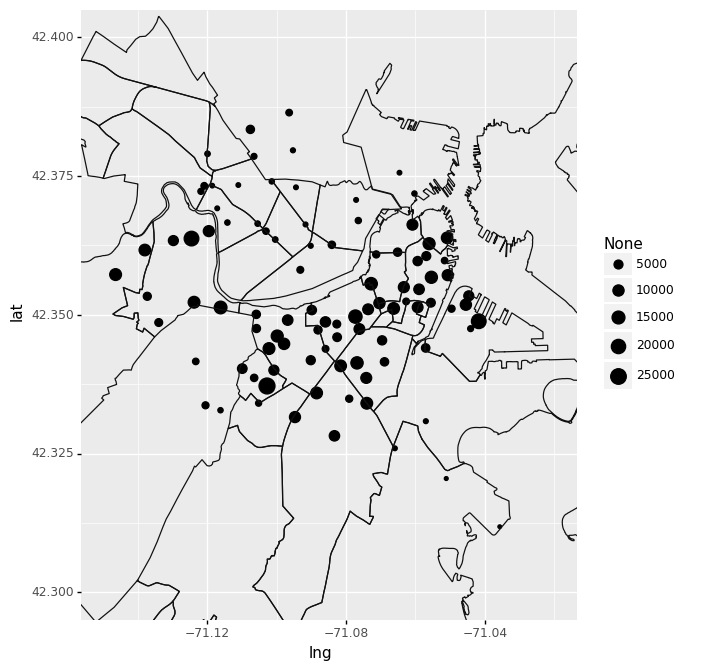

<ggplot: (328572775)>

In [146]:
ggplot() + geom_point(dataStations, aes(x='lng', y='lat', size=numViajes))\
+ geom_map(boston, fill=None, alpha=0.2) + geom_map(cambridge, fill=None, alpha=0.2) \
+ coord_fixed(xlim=(-71.15,-71.02), ylim=(42.30,42.40),ratio=1.6)

Otra forma de hacerlo: agregando la informacion como columnas del dataframe de estaciones.

In [147]:
statViajes=finalData.groupby('start_station')['duration'].agg(['count','mean', 'max'])
statViajes



,count,mean,max
start_station,,,
10,7303,18.459743,1417.333333
11,5395,17.268233,1323.633333
12,5185,17.006680,1070.883333
13,3817,17.958432,1387.300000
14,7158,14.648654,1175.950000
...,...,...,...
94,257,24.818936,1070.933333
95,273,14.770696,139.950000
96,247,17.309379,305.300000


In [148]:
dataStationsViajes=pd.merge(dataStations, statViajes, left_on='id', right_on='start_station')
dataStationsViajes

,id,name,lat,lng,count,mean,max
0,3,Colleges of the Fenway,42.340021,-71.100812,4445,18.166689,1143.716667
1,4,Tremont St. at Berkeley St.,42.345392,-71.069616,8193,18.252179,1422.600000
2,5,Northeastern U / North Parking Lot,42.341814,-71.090179,4902,17.805025,1189.733333
3,6,Cambridge St. at Joy St.,42.361285,-71.065140,9450,22.946873,1404.216667
4,7,Fan Pier,42.353412,-71.044624,4045,22.634351,1409.483333
...,...,...,...,...,...,...,...
90,94,Charlestown - Main St at Austin St,42.375603,-71.064608,257,24.818936,1070.933333
91,95,Cambridge St - at Columbia St / Webster Ave,42.372969,-71.094445,273,14.770696,139.950000
92,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,247,17.309379,305.300000
93,97,Harvard University River Houses at DeWolfe St...,42.369182,-71.117152,273,25.702320,162.933333


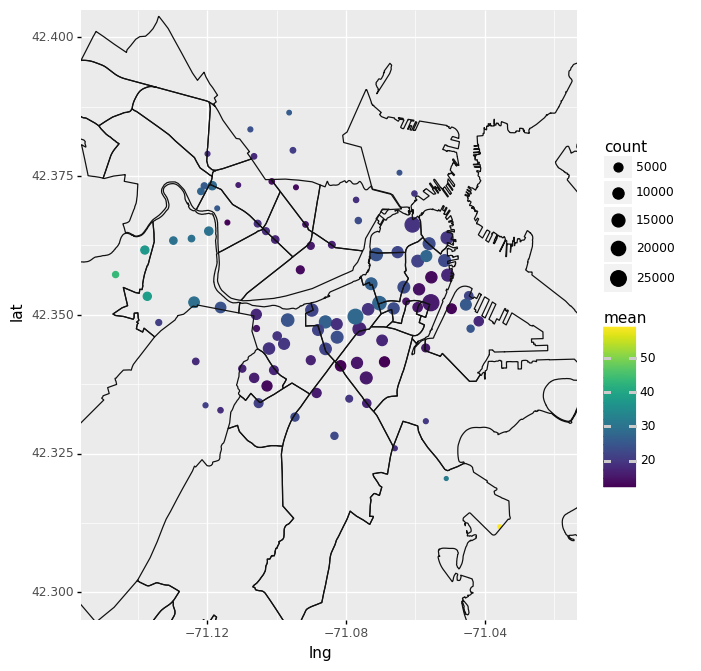

<ggplot: (327202079)>

In [150]:
ggplot() + geom_point(dataStationsViajes, aes(x='lng', y='lat', size='count', color='mean'))\
+ geom_map(boston, fill=None) + geom_map(cambridge, fill=None) \
+ coord_fixed(xlim=(-71.15,-71.02), ylim=(42.30,42.40),ratio=1.6)

## Otras geometrías de ggplot

Analicemos ahora los datos. Veamos a que hora se realizan los viajes. Para esto, usamos la geometría `Histogram`, que solo tiene un aesthetic: `x`.

Tomemos un subconjunto de 50000 viajes, para poder trabajar mas rápido

In [153]:
muestra = finalData.sample(50000)

In [155]:
muestra['hora_inicio']=muestra['start_date'].dt.hour
muestra['dia']=muestra['start_date'].dt.day_name()
muestra

,id_x,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,...,id_y,name_x,lat_x,lng_x,id,name_y,lat_y,lng_y,hora_inicio,dia
86323,2495,126.916667,2011-07-31 15:19:00.040,24,2011-07-31 17:26:00.040,24,B00346,Casual,NaN,NaN,...,24,Seaport Square - Seaport Blvd. at Boston Wharf,42.351821,-71.045461,24,Seaport Square - Seaport Blvd. at Boston Wharf,42.351821,-71.045461,15,Sunday
361802,465000,49.366667,2012-08-13 13:18:00.040,42,2012-08-13 14:07:00.040,45,T01328,Casual,NaN,NaN,...,42,Boylston St. at Arlington St.,42.352096,-71.070378,45,Yawkey Way at Boylston St.,42.344763,-71.097880,13,Monday
541647,466814,5.500000,2012-08-13 20:26:00.040,69,2012-08-13 20:32:00.040,66,T01124,Registered,02446,1963.0,...,69,Coolidge Corner - Beacon St @ Centre St,42.341598,-71.123338,66,Allston Green District - Commonwealth Ave & Gr...,42.348607,-71.134010,20,Monday
437116,454663,30.933333,2012-08-09 17:43:00.040,17,2012-08-09 18:14:00.040,55,B00194,Casual,NaN,NaN,...,17,Harvard University Housing - 111 Western Ave. ...,42.365074,-71.119581,55,Boylston / Mass Ave,42.347265,-71.088088,17,Thursday
397102,216144,34.950000,2012-04-24 12:10:00.040,32,2012-04-24 12:45:00.040,30,B00559,Registered,02199,1966.0,...,32,Landmark Centre,42.343912,-71.102221,30,Brigham Cir / Huntington Ave,42.334073,-71.105221,12,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80473,151545,10.133333,2011-11-20 14:08:00.050,47,2011-11-20 14:18:00.050,24,B00571,Casual,NaN,NaN,...,47,Cross St. at Hanover St.,42.362811,-71.056067,24,Seaport Square - Seaport Blvd. at Boston Wharf,42.351821,-71.045461,14,Sunday
412471,235166,100.116667,2012-05-06 02:37:00.040,49,2012-05-06 04:17:00.040,3,B00433,Casual,NaN,NaN,...,49,Stuart St. at Charles St.,42.351146,-71.066289,3,Colleges of the Fenway,42.340021,-71.100812,2,Sunday
394239,177199,21.200000,2012-04-02 17:42:00.040,22,2012-04-02 18:04:00.040,30,B00586,Registered,02446,1976.0,...,22,South Station - 700 Atlantic Ave.,42.352175,-71.055547,30,Brigham Cir / Huntington Ave,42.334073,-71.105221,17,Monday
82152,38786,11.316667,2011-08-29 07:31:00.040,38,2011-08-29 07:43:00.040,24,B00548,Registered,01890,1955.0,...,38,TD Garden - Legends Way,42.366231,-71.060868,24,Seaport Square - Seaport Blvd. at Boston Wharf,42.351821,-71.045461,7,Monday


In [156]:
muestra['dia']=muestra['dia'].astype('category').cat.reorder_categories(['Monday',  'Tuesday', 'Wednesday','Thursday','Friday','Saturday', 'Sunday'])


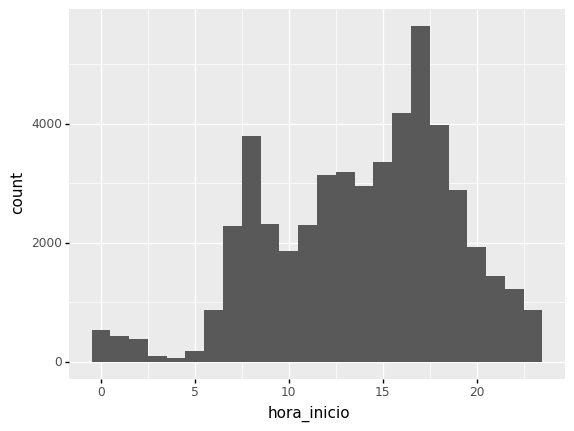

<ggplot: (327383760)>

In [159]:
ggplot(muestra, aes(x='hora_inicio')) + geom_histogram(binwidth=1)

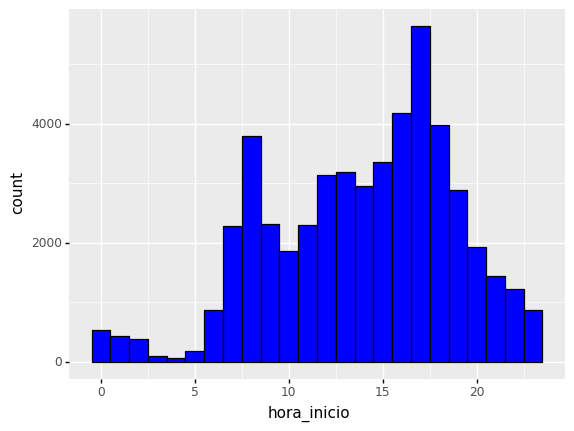

<ggplot: (327268042)>

In [160]:
ggplot(muestra, aes(x='hora_inicio')) + geom_histogram(binwidth=1, color="black", fill="blue")

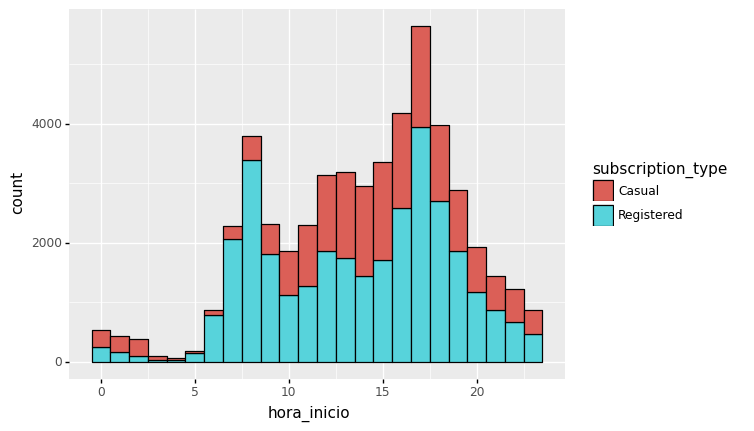

<ggplot: (327341319)>

In [161]:
ggplot(muestra, aes(x='hora_inicio', fill="subscription_type"))\
+ geom_histogram(binwidth=1, color="black")


In [167]:
muestra['start_date'].dt.weekday

86323     6
361802    0
541647    0
437116    3
397102    1
         ..
80473     6
412471    6
394239    0
82152     0
52020     3
Name: start_date, Length: 50000, dtype: int64

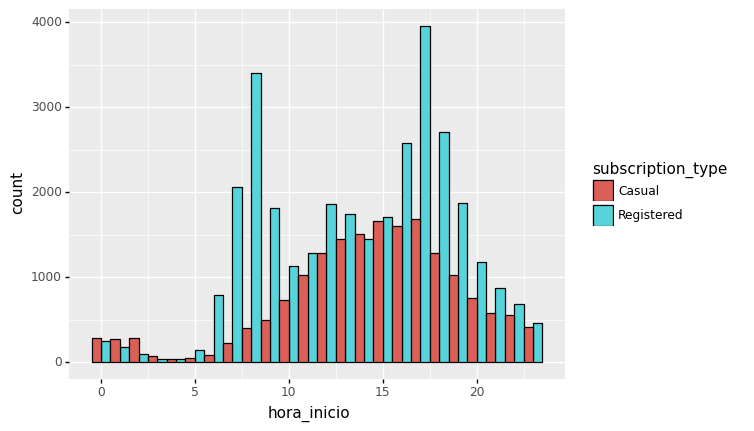

<ggplot: (328002166)>

In [170]:
ggplot(muestra, aes(x='hora_inicio', fill="subscription_type"))\
+ geom_histogram(binwidth=1, color="black", position="dodge")

Aquí están graficados todos los datos agregados. Supongamos que queremos este gráfico pero para cada día de la semana. Podemos hacer multiples graficos separados usando `facet` (o sea, como un `groupby` de graficos)


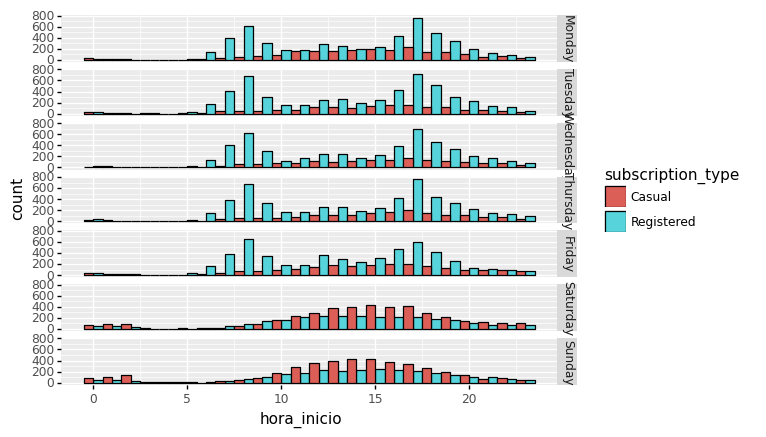

<ggplot: (327012602)>

In [177]:
ggplot(muestra, aes(x='hora_inicio', fill="subscription_type"))\
+ geom_histogram(binwidth=1, color="black", position="dodge")+ facet_grid('dia~.')

In [180]:
muestra.columns

Index(['id_x', 'duration', 'start_date', 'start_station', 'end_date',
       'end_station', 'bike_nr', 'subscription_type', 'zip_code', 'birth_date',
       'gender', 'id_y', 'name_x', 'lat_x', 'lng_x', 'id', 'name_y', 'lat_y',
       'lng_y', 'hora_inicio', 'dia'],
      dtype='object')

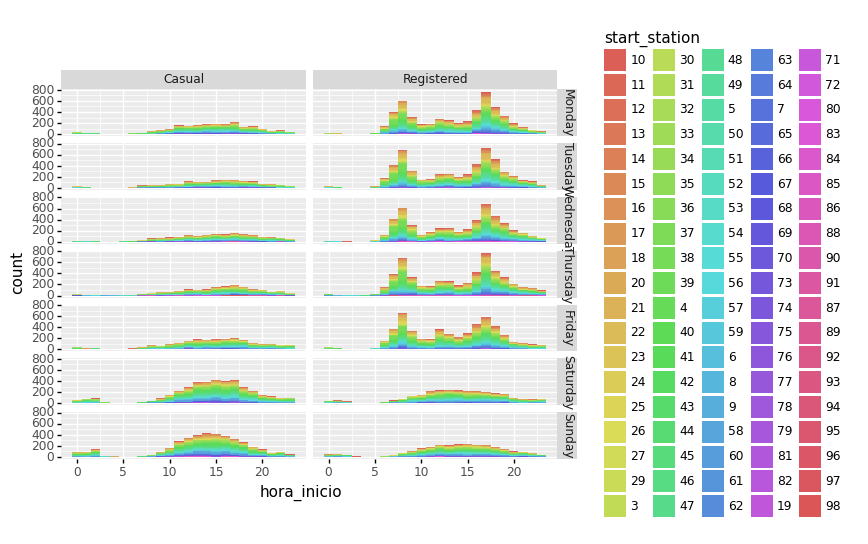

<ggplot: (328750228)>

In [183]:
ggplot(muestra, aes(x='hora_inicio', fill="start_station"))\
+ geom_histogram(binwidth=1)+ facet_grid('dia~subscription_type')

## Ejercicio 4
Haga un histograma con la duración del viaje, con bins de 10 minutos, y separelo para cada tipo de subscripción.

/usr/local/lib/python3.8/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_bin : Removed 244 rows containing non-finite values.
/usr/local/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_histogram : Removed 4 rows containing missing values.


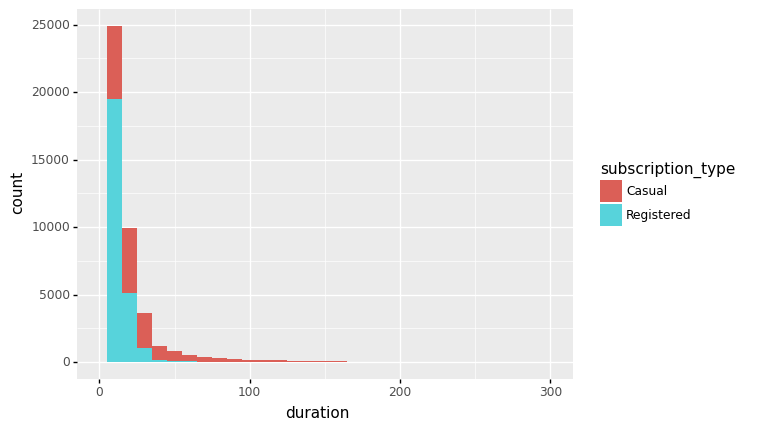

<ggplot: (327188191)>

In [189]:
ggplot(muestra, aes(x="duration", fill="subscription_type"))\
+geom_histogram(binwidth=10)\
+ xlim([0,300])

/usr/local/lib/python3.8/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_bin : Removed 244 rows containing non-finite values.
/usr/local/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_histogram : Removed 4 rows containing missing values.


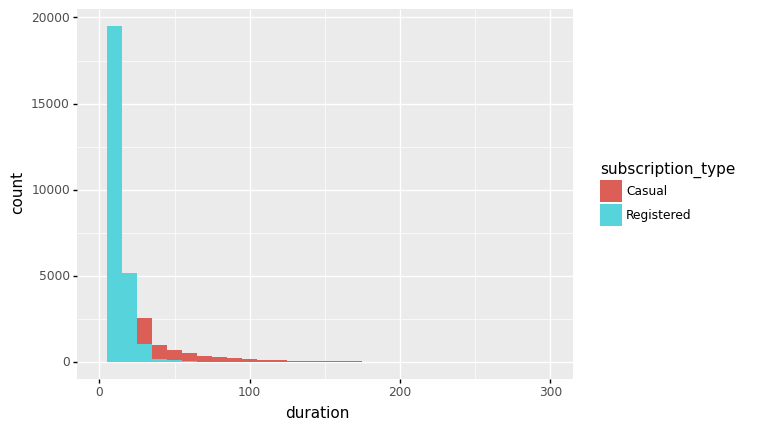

<ggplot: (328034883)>

In [190]:
ggplot(muestra, aes(x="duration", fill="subscription_type"))\
+geom_histogram(binwidth=10, position='identity'ggplot(muestra, aes(x='duration', fill='subscription_type')) \
+ geom_histogram(binwidth=10, position='identity', alpha=0.5))\
+ xlim([0,300])

Si no queremos que vaya uno sobre el otro, podemos 
fijar su posicion con `position = 'identity'`. 
(no olvidar usar trasparencia para verlo, `alpha=0.5`)

/usr/local/lib/python3.8/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_bin : Removed 244 rows containing non-finite values.
/usr/local/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_histogram : Removed 4 rows containing missing values.


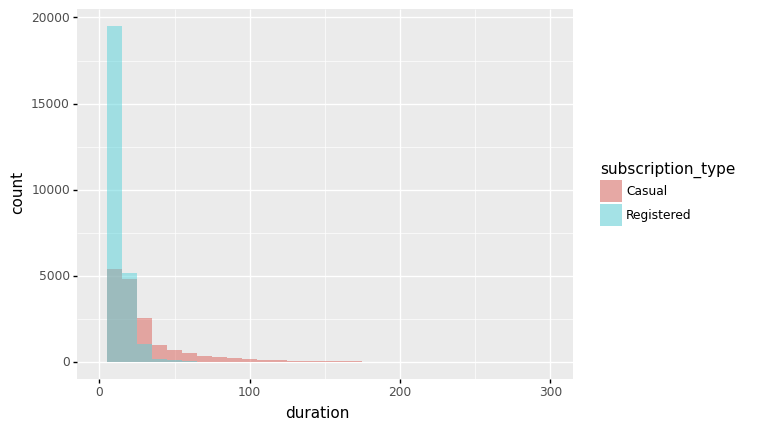

<ggplot: (330517426)>

In [192]:
ggplot(muestra, aes(x='duration', fill='subscription_type')) \
+ geom_histogram(binwidth=10, position='identity', alpha=0.5)\
+ xlim([0,300])

/usr/local/lib/python3.8/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_bin : Removed 244 rows containing non-finite values.
/usr/local/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_histogram : Removed 28 rows containing missing values.


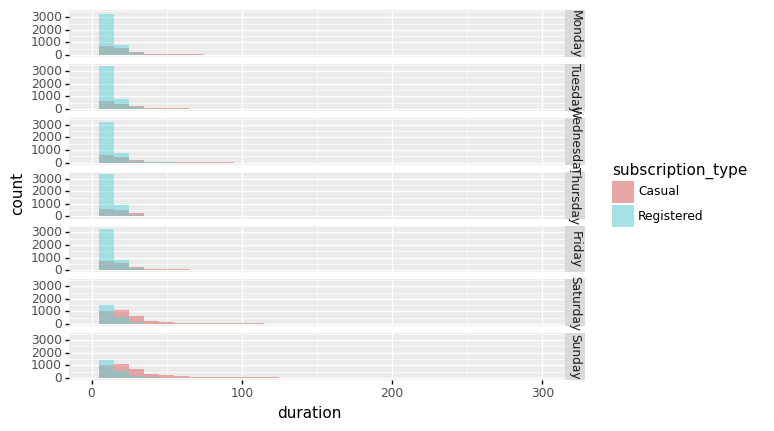

<ggplot: (329804014)>

In [197]:
ggplot(muestra, aes(x='duration', fill='subscription_type')) \
+ geom_histogram(binwidth=10, position='identity', alpha=0.5)\
+ xlim([0,300]) \
+ facet_grid('dia~.')

Histogramas son utiles, pero solo permiten explorar en una dimensión. Si queremos ver el dia y la hora simulateamente, podemos hacer histogramas de dos dimensiones.

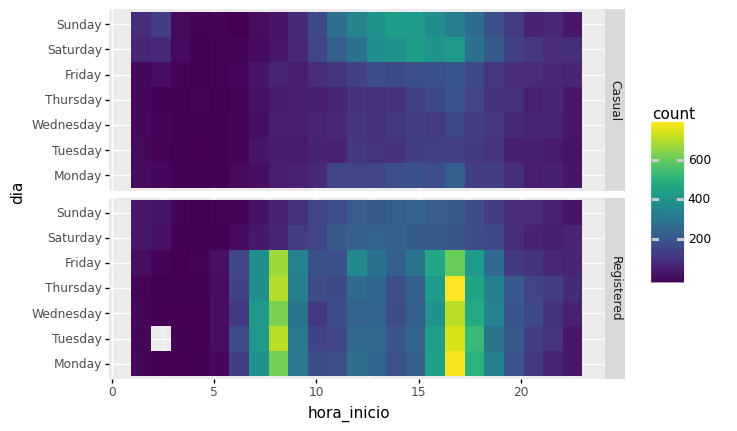

<ggplot: (327202067)>

In [199]:
ggplot(muestra, aes(x='hora_inicio', y='dia')) + geom_bin2d(bins=24) \
+ facet_grid('subscription_type~.')

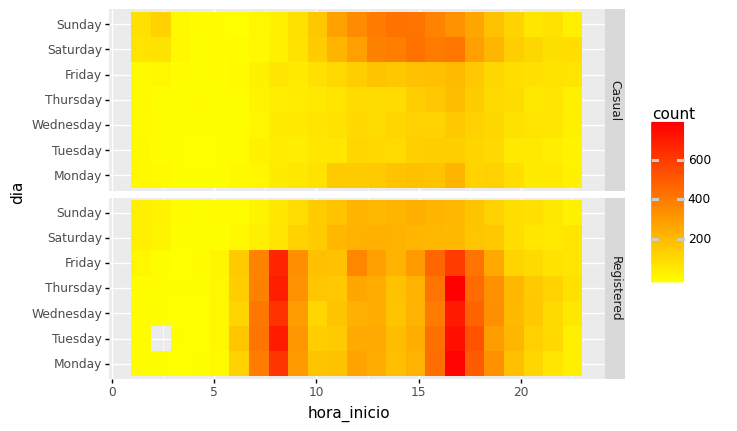

<ggplot: (330369741)>

In [205]:
ggplot(muestra, aes(x='hora_inicio', y='dia')) + geom_bin2d(bins=24) \
+ facet_grid('subscription_type~.') \
+ scale_fill_gradient(low = "yellow", high = "red")




### Boxplot
Permite estudiar distintos parametros estadísticos de un conjunto de datos. La caja representa los datos en entre el primer y tercer cuantíl. Los puntos son outliers.


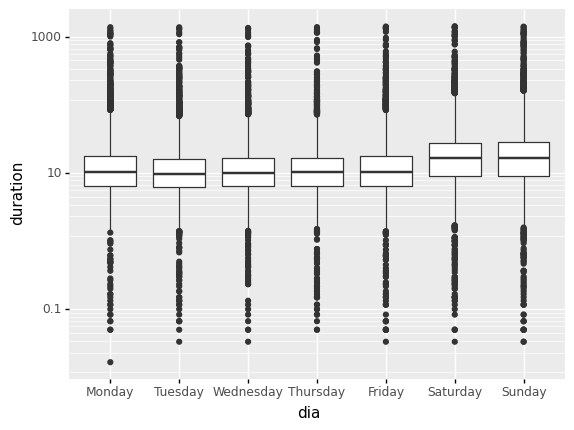

<ggplot: (330470919)>

In [209]:
ggplot(muestra, aes(x='dia', y='duration')) + geom_boxplot() + scale_y_log10()    


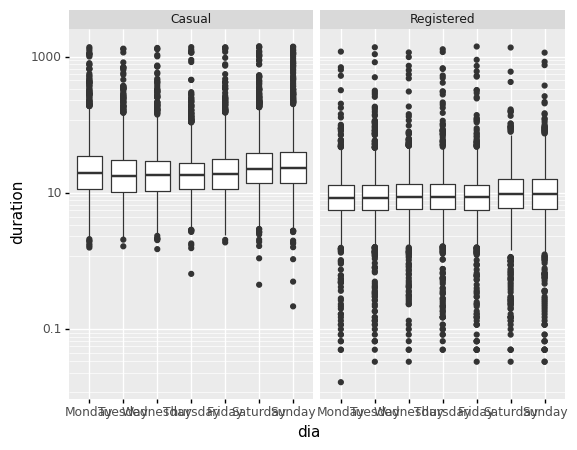

<ggplot: (330007224)>

In [216]:
ggplot(muestra, aes(x='dia', y='duration')) + geom_boxplot() + scale_y_log10() \
+facet_grid('.~subscription_type')

y mucho mas...  

Mas ejemplos: [https://plotnine.readthedocs.io]

In [214]:
muestra.columns

Index(['id_x', 'duration', 'start_date', 'start_station', 'end_date',
       'end_station', 'bike_nr', 'subscription_type', 'zip_code', 'birth_date',
       'gender', 'id_y', 'name_x', 'lat_x', 'lng_x', 'id', 'name_y', 'lat_y',
       'lng_y', 'hora_inicio', 'dia'],
      dtype='object')